### XGBoost_Pred_15OUT2020_AD_dfa_2_J18

## bibliotecas a serem usadas

In [1]:
import plotly_express as px
# biblioteca nova, para visualização com diferentes formas
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
from scipy import stats
import scipy
import seaborn as sns
import statsmodels
import statsmodels.stats.api as sms

In [2]:
# parâmetros dos gráficos para o arquivo
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (16, 8),
          'axes.labelsize': 'x-large',
          'axes.titlesize':'x-large',
          'xtick.labelsize':'x-large',
          'ytick.labelsize':'x-large'}

%matplotlib inline
plt.rcParams.update(params)

### arquivo_dados_formatados_agrupados

In [3]:
df=pd.read_csv('d_f_a_2.csv',encoding = "ISO-8859-1", sep=";", low_memory=False, nrows=1000000)
# somente 100 mil linhas, tempo computação adequável

In [4]:
df.head(3)

cod_muni  qtd_mora  incidencia diag_princ  prevalencia  renda_media_mora  \
0    290010      8301           1        J04     0.000121          0.103943   
1    290010      8301           1        J06     0.000121          0.103943   
2    290010      8301           5        J15     0.000602          0.103943   

   SITU1_entorno  SITU2_entorno  SITU3_entorno  SITU4_entorno  ...  \
0       0.463481            0.0            0.0            0.0  ...   
1       0.463481            0.0            0.0            0.0  ...   
2       0.463481            0.0            0.0            0.0  ...   

   V032_domicilio02  V033_domicilio02  V034_domicilio02  V035_domicilio02  \
0          0.005892           0.39911          0.016835          0.035354   
1          0.005892           0.39911          0.016835          0.035354   
2          0.005892           0.39911          0.016835          0.035354   

   V036_domicilio02  V037_domicilio02  V038_domicilio02  V041_domicilio02  \
0               0.0          0.010582          0.970779          0.027417   
1               0.0          0.010582          0.970779          0.027417   
2               0.0          0.010582          0.970779          0.027417   

   V045_domicilio02  V089_domicilio02  
0          0.490861          0.509139  
1          0.490861          0.509139  
2          0.490861          0.509139  

[3 rows x 83 columns]

In [5]:
df.fillna(0.0001)

cod_muni  qtd_mora  incidencia diag_princ  prevalencia  \
0         290010      8301           1        J04     0.000121   
1         290010      8301           1        J06     0.000121   
2         290010      8301           5        J15     0.000602   
3         290010      8301          12        J18     0.001446   
4         290010      8301           1        J34     0.000121   
...          ...       ...         ...        ...          ...   
140623    432380     12396           5        K85     0.000403   
140624    432380     12396          14        K86     0.001129   
140625    432380     12396           2        K90     0.000161   
140626    432380     12396           1        K91     0.000081   
140627    432380     12396           7        K92     0.000565   

        renda_media_mora  SITU1_entorno  SITU2_entorno  SITU3_entorno  \
0               0.103943       0.463481            0.0            0.0   
1               0.103943       0.463481            0.0            0.0   
2               0.103943       0.463481            0.0            0.0   
3               0.103943       0.463481            0.0            0.0   
4               0.103943       0.463481            0.0            0.0   
...                  ...            ...            ...            ...   
140623          0.400141       0.995594            0.0            0.0   
140624          0.400141       0.995594            0.0            0.0   
140625          0.400141       0.995594            0.0            0.0   
140626          0.400141       0.995594            0.0            0.0   
140627          0.400141       0.995594            0.0            0.0   

        SITU4_entorno  ...  V032_domicilio02  V033_domicilio02  \
0                 0.0  ...          0.005892          0.399110   
1                 0.0  ...          0.005892          0.399110   
2                 0.0  ...          0.005892          0.399110   
3                 0.0  ...          0.005892          0.399110   
4                 0.0  ...          0.005892          0.399110   
...               ...  ...               ...               ...   
140623            0.0  ...          0.001206          0.003699   
140624            0.0  ...          0.001206          0.003699   
140625            0.0  ...          0.001206          0.003699   
140626            0.0  ...          0.001206          0.003699   
140627            0.0  ...          0.001206          0.003699   

        V034_domicilio02  V035_domicilio02  V036_domicilio02  \
0               0.016835          0.035354               0.0   
1               0.016835          0.035354               0.0   
2               0.016835          0.035354               0.0   
3               0.016835          0.035354               0.0   
4               0.016835          0.035354               0.0   
...                  ...               ...               ...   
140623          0.002493          0.000161               0.0   
140624          0.002493          0.000161               0.0   
140625          0.002493          0.000161               0.0   
140626          0.002493          0.000161               0.0   
140627          0.002493          0.000161               0.0   

        V037_domicilio02  V038_domicilio02  V041_domicilio02  \
0               0.010582          0.970779          0.027417   
1               0.010582          0.970779          0.027417   
2               0.010582          0.970779          0.027417   
3               0.010582          0.970779          0.027417   
4               0.010582          0.970779          0.027417   
...                  ...               ...               ...   
140623          0.000000          0.995738          0.001206   
140624          0.000000          0.995738          0.001206   
140625          0.000000          0.995738          0.001206   
140626          0.000000          0.995738          0.001206   
140627          0.000000          0.995738          0.001206   

       

In [6]:
df.isnull().sum()

cod_muni            0
qtd_mora            0
incidencia          0
diag_princ          0
prevalencia         0
                   ..
V037_domicilio02    0
V038_domicilio02    0
V041_domicilio02    0
V045_domicilio02    0
V089_domicilio02    0
Length: 83, dtype: int64

In [7]:
df.sample(2)

cod_muni  qtd_mora  incidencia diag_princ  prevalencia  \
33231    311660     25387           1        K91     0.000039   
90614    352680     61195          13        J43     0.000212   

       renda_media_mora  SITU1_entorno  SITU2_entorno  SITU3_entorno  \
33231          0.285432       0.810640       0.004082       0.000000   
90614          0.400791       0.968807       0.000882       0.006228   

       SITU4_entorno  ...  V032_domicilio02  V033_domicilio02  \
33231            0.0  ...          0.034807          0.108572   
90614            0.0  ...          0.008775          0.006430   

       V034_domicilio02  V035_domicilio02  V036_domicilio02  V037_domicilio02  \
33231          0.002871          0.000931               0.0          0.002871   
90614          0.001091          0.000114               0.0          0.004526   

       V038_domicilio02  V041_domicilio02  V045_domicilio02  V089_domicilio02  
33231          0.983858          0.001242          0.507858          0.492142  
90614          0.995686          0.000521          0.496484          0.503516  

[2 rows x 83 columns]

In [8]:
# avaliação da frequência de cada município
df.cod_muni.value_counts()

350950    116
292740    116
310620    116
352590    115
354870    113
         ... 
291790     18
316700     17
317047     14
312247     14
312620     12
Name: cod_muni, Length: 2410, dtype: int64

In [9]:
# avaliação da frequência_doenças
df.diag_princ.value_counts()

K40    2409
J18    2407
K80    2406
J44    2399
K81    2398
       ... 
K03      34
J70      25
J68      14
J99      12
J92       6
Name: diag_princ, Length: 122, dtype: int64

### 2a_doença mais frequente = J18

In [10]:
# separação na doença mais frequente desse arquivo = K40
temp = np.where(df['diag_princ'].isin(['J18']))
df18 = df.loc[temp]
# reunir tudo
df18.sample(3)

cod_muni  qtd_mora  incidencia diag_princ  prevalencia  \
132357    431640     39090        1214        J18     0.031057   
78979     351210      5973         113        J18     0.018919   
96774     353540     14549         335        J18     0.023026   

        renda_media_mora  SITU1_entorno  SITU2_entorno  SITU3_entorno  \
132357          0.299496       0.870995            0.0       0.003995   
78979           0.281325       0.716261            0.0       0.000000   
96774           0.296883       0.968021            0.0       0.003457   

        SITU4_entorno  ...  V032_domicilio02  V033_domicilio02  \
132357            0.0  ...          0.121616          0.067494   
78979             0.0  ...          0.007674          0.161662   
96774             0.0  ...          0.002606          0.018446   

        V034_domicilio02  V035_domicilio02  V036_domicilio02  \
132357          0.039237          0.005566          0.000604   
78979           0.009510          0.009343          0.000000   
96774           0.007406          0.001989          0.000000   

        V037_domicilio02  V038_domicilio02  V041_domicilio02  \
132357          0.009268          0.978618          0.005843   
78979           0.000667          0.992159          0.004338   
96774           0.002263          0.994514          0.003154   

        V045_domicilio02  V089_domicilio02  
132357          0.486337          0.513663  
78979           0.511512          0.488489  
96774           0.501406          0.498594  

[3 rows x 83 columns]

## XGBOOST_Predição

In [11]:
! pip install lightgbm
! pip install xgboost

### Primeiro método_XGBoost

In [12]:
# Preparação dos arquivos de entrada (X) e saída (y)
X = df18.drop(['prevalencia','diag_princ'],axis=1)
y = df18.loc[:,'prevalencia']

In [13]:
y.head(2)

3     0.001446
37    0.016303
Name: prevalencia, dtype: float64

In [14]:
import xgboost as xgb

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import RobustScaler

In [16]:
# Divisão entre arquivos de treino e teste, com corte em 30%
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size =0.3, random_state=1234)

In [17]:
# regressor com ajuste inicial
regressor = xgb.XGBRegressor(n_estimators=100,reg_lambda=1,gamma=0,max_depth=3)

In [18]:
# preparação do regressor
regressor.fit(X_train, y_train)

C:\Users\aferr\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning:

Series.base is deprecated and will be removed in a future version



[20:08:52] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [19]:
# avaliação dos parâmetros mais importantes
pd.DataFrame(regressor.feature_importances_.reshape(1, -1), columns=X.columns)

cod_muni  qtd_mora  incidencia  renda_media_mora  SITU1_entorno  \
0  0.000424  0.117256    0.117086          0.027724       0.001615   

   SITU2_entorno  SITU3_entorno  SITU4_entorno  SITU5_entorno  SITU6_entorno  \
0            0.0            0.0            0.0       0.004316            0.0   

   ...  V032_domicilio02  V033_domicilio02  V034_domicilio02  \
0  ...               0.0               0.0               0.0   

   V035_domicilio02  V036_domicilio02  V037_domicilio02  V038_domicilio02  \
0               0.0               0.0               0.0               0.0   

   V041_domicilio02  V045_domicilio02  V089_domicilio02  
0               0.0               0.0               0.0  

[1 rows x 81 columns]

### Há features que não importam, como SITU2_entorno etc. Avaliação das importâncias dos 15 melhores

<AxesSubplot:>

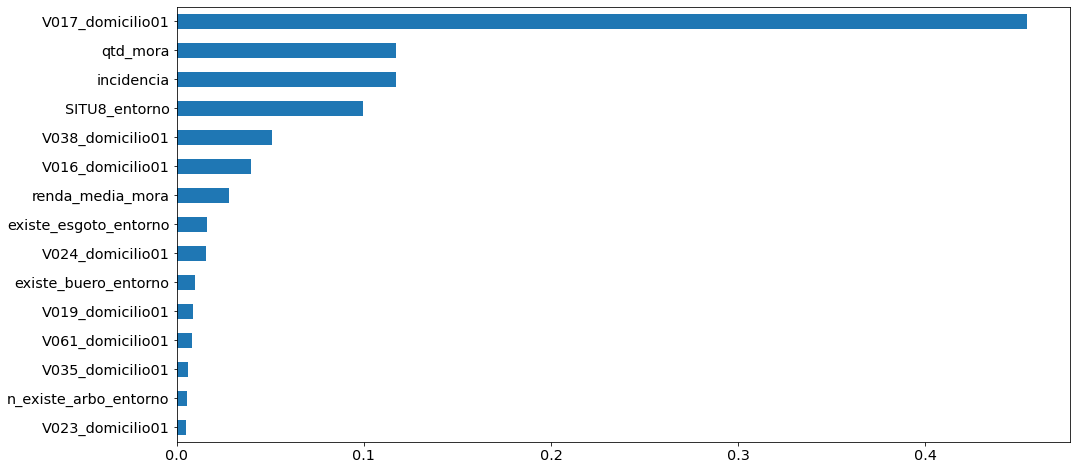

In [20]:
(pd.Series(regressor.feature_importances_, index=X.columns)
   .nlargest(15).sort_values().plot.barh())
# Mesmo assim, há fatores com importância ainda muito baixa. Selecionamos até o "existe_buero_entorno"

In [21]:
pd.set_option('display.max_columns', None)

In [22]:
X.head(1)

cod_muni  qtd_mora  incidencia  renda_media_mora  SITU1_entorno  \
3    290010      8301          12          0.103943       0.463481   

   SITU2_entorno  SITU3_entorno  SITU4_entorno  SITU5_entorno  SITU6_entorno  \
3            0.0            0.0            0.0       0.083528            0.0   

   SITU7_entorno  SITU8_entorno  V001_entorno  existe_pav_entorno  \
3            0.0       0.452991           1.0            0.371018   

   n_existe_pav_entorno  existe_calc_entorno  n_existe_calc_entorno  \
3              0.090132             0.293706               0.167444   

   existe_mfio_entorno  n_existe_mfio_entorno  existe_buero_entorno  \
3             0.379953               0.081197              0.015151   

   n_existe_buero_entorno  existe_arbo_entorno  n_existe_arbo_entorno  \
3                0.445998             0.348873               0.112277   

   existe_esgoto_entorno  n_existe_esgoto_entorno  existe_lixo_entorno  \
3                 0.0777                  0.38345             0.021756   

   n_existe_lixo_entorno  V001_domicilio01  V012_domicilio01  \
3               0.439394               1.0          0.912505   

   V013_domicilio01  V014_domicilio01  V015_domicilio01  V016_domicilio01  \
3          0.001161          0.009679          0.073171          0.963995   

   V017_domicilio01  V018_domicilio01  V019_domicilio01  V020_domicilio01  \
3          0.096012          0.033682          0.826171          0.003872   

   V021_domicilio01  V022_domicilio01  V023_domicilio01  V024_domicilio01  \
3          0.000387          0.003872           0.03252          0.957027   

   V034_domicilio01  V035_domicilio01  V036_domicilio01  V037_domicilio01  \
3          0.039489          0.546651          0.538521           0.00813   

   V038_domicilio01  V039_domicilio01  V040_domicilio01  V041_domicilio01  \
3          0.381339          0.016647          0.039876               0.0   

   V042_domicilio01  V043_domicilio01  V046_domicilio01  V060_domicilio01  \
3          0.012002          0.966705           0.02981          0.121564   

   V061_domicilio01  V001_domicilio02  V012_domicilio02  V013_domicilio02  \
3          0.078204               1.0          0.903078          0.001082   

   V014_domicilio02  V015_domicilio02  V016_domicilio02  V017_domicilio02  \
3          0.010702          0.083333          0.968975          0.087061   

   V018_domicilio02  V019_domicilio02  V020_domicilio02  V021_domicilio02  \
3          0.034271          0.839105          0.003968           0.00024   

   V022_domicilio02  V023_domicilio02  V024_domicilio02  V029_domicilio02  \
3          0.004329          0.029221          0.963083          0.035113   

   V030_domicilio02  V031_domicilio02  V032_domicilio02  V033_domicilio02  \
3          0.536315          0.530423          0.005892           0.39911   

   V034_domicilio02  V035_domicilio02  V036_domicilio02  V037_domicilio02  \
3          0.016835          0.035354               0.0          0.010582   

   V038_domicilio02  V041_domicilio02  V045_domicilio02  V089_domicilio02  
3          0.970779          0.027417          0.490861          0.509139

### seleção dos 10 mais importantes para prosseguir com o XGBoost

In [24]:
X = df18.loc[:, ['V017_domicilio01','qtd_mora','incidencia','SITU8_entorno','V038_domicilio01','V016_domicilio01','renda_media_mora','existe_esgoto_entorno','V024_domicilio01','existe_buero_entorno']]

In [25]:
x_train,x_val,y_train,y_val=train_test_split(X,y,test_size =0.3, random_state=1234)

In [26]:
x_train

V017_domicilio01  qtd_mora  incidencia  SITU8_entorno  \
55006           0.696691      3121          64       0.068965   
108237          0.768212      3551         297       0.173228   
99095           0.943594    359825        3856       0.016317   
140478          0.006633      3328         180       0.786956   
50919           0.401973      2657          46       0.424505   
...                  ...       ...         ...            ...   
15436           0.006796     24104          28       0.385139   
120432          0.006048      2866         112       0.746976   
36772           0.748322      5749          50       0.187711   
72965           0.643793      4914          41       0.307298   
39664           0.001347      5114          36       0.505085   

        V038_domicilio01  V016_domicilio01  renda_media_mora  \
55006           0.048713          0.959559          0.285783   
108237          0.033940          0.939569          0.219493   
99095           0.004083          0.980525          0.546718   
140478          0.503317          0.942786          0.200442   
50919           0.387176          0.983970          0.129663   
...                  ...               ...               ...   
15436           0.325333          0.831261          0.051505   
120432          0.199597          0.987903          0.168055   
36772           0.079418          0.988814          0.194323   
72965           0.100437          0.971304          0.241825   
39664           0.662626          0.814141          0.070142   

        existe_esgoto_entorno  V024_domicilio01  existe_buero_entorno  
55006                0.000000          0.959559              0.678161  
108237               0.000000          0.933775              0.400700  
99095                0.024015          0.978189              0.412731  
140478               0.000000          0.900498              0.046087  
50919                0.000000          0.945746              0.003713  
...                       ...               ...                   ...  
15436                0.275637          0.730046              0.000869  
120432               0.000000          0.957661              0.041331  
36772                0.000564          0.987696              0.348365  
72965                0.000640          0.966937              0.220871  
39664                0.006780          0.801347              0.000000  

[1684 rows x 10 columns]

In [27]:
x_train.describe()

V017_domicilio01      qtd_mora    incidencia  SITU8_entorno  \
count       1684.000000  1.684000e+03   1684.000000    1684.000000   
mean           0.471169  3.169151e+04    438.475653       0.282566   
std            0.327982  1.122745e+05    965.887322       0.209379   
min            0.000000  8.050000e+02      1.000000       0.000000   
25%            0.130344  4.833000e+03     47.750000       0.106241   
50%            0.518053  1.017950e+04    116.500000       0.236689   
75%            0.771166  2.253750e+04    460.250000       0.433121   
max            0.984130  2.663922e+06  15702.000000       0.939333   

       V038_domicilio01  V016_domicilio01  renda_media_mora  \
count       1684.000000       1684.000000       1684.000000   
mean           0.182482          0.947396          0.249327   
std            0.163333          0.078868          0.132080   
min            0.000000          0.166370          0.013567   
25%            0.045782          0.941165          0.139803   
50%            0.132820          0.979128          0.251189   
75%            0.283013          0.990067          0.331597   
max            0.737743          1.000000          1.000000   

       existe_esgoto_entorno  V024_domicilio01  existe_buero_entorno  
count            1684.000000       1684.000000           1684.000000  
mean                0.031767          0.923728              0.222285  
std                 0.065663          0.098468              0.186669  
min                 0.000000          0.166370              0.000000  
25%                 0.000000          0.901293              0.065064  
50%                 0.005601          0.968975              0.179894  
75%                 0.030333          0.984698              0.338243  
max                 0.654220          1.000000              0.893226

In [28]:
y_pred_1 = regressor.predict(X_test)

In [29]:
mean_squared_error(y_test, y_pred_1)

1.2143479072449277e-05

In [34]:
plt.scatter(X_test['cod_muni'], y_pred_1, c = "blue", marker = "s")
plt.title("Primeiro_método_XGBoost: cod_muni x y_pred_1_J18")
plt.xlabel("cod_muni")
plt.ylabel("prevalencia predita")
plt.show()

In [32]:
errop1= (y_test - y_pred_1)/y_test

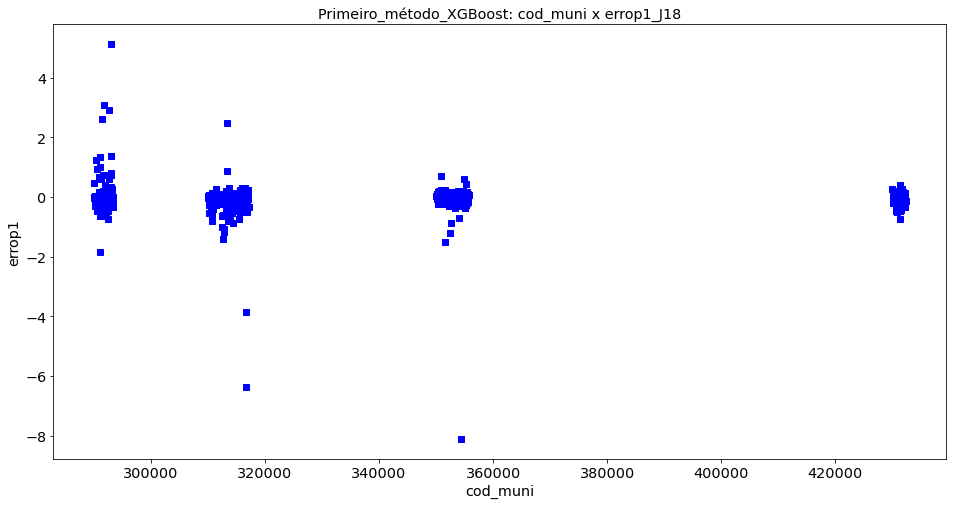

In [33]:
plt.scatter(X_test['cod_muni'], errop1, c = "blue", marker = "s")
plt.title("Primeiro_método_XGBoost: cod_muni x errop1_J18")
plt.xlabel("cod_muni")
plt.ylabel("errop1")
plt.show()

### Segundo método XGBoost

In [40]:
# https://www.kaggle.com/pablocastilla/predict-house-prices-with-xgboost-regression

In [41]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import xgboost
import csv as csv
from xgboost import plot_importance
from matplotlib import pyplot
from sklearn.model_selection import cross_val_score,KFold
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
from scipy.stats import skew
from collections import OrderedDict

In [42]:
model = xgboost.XGBRegressor(colsample_bytree=0.4,
                 gamma=0,                 
                 learning_rate=0.07,
                 max_depth=3,
                 min_child_weight=1.5,
                 n_estimators=10000,                                                                    
                 reg_alpha=0.75,
                 reg_lambda=0.45,
                 subsample=0.6,
                 seed=42) 

In [43]:
model.fit(X_train,y_train)

C:\Users\aferr\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning:

Series.base is deprecated and will be removed in a future version



[21:00:43] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.4, gamma=0,
             importance_type='gain', learning_rate=0.07, max_delta_step=0,
             max_depth=3, min_child_weight=1.5, missing=None,
             n_estimators=10000, n_jobs=1, nthread=None, objective='reg:linear',
             random_state=0, reg_alpha=0.75, reg_lambda=0.45,
             scale_pos_weight=1, seed=42, silent=None, subsample=0.6,
             verbosity=1)

In [44]:
#for tuning parameters
#parameters_for_testing = {
#    'colsample_bytree':[0.4,0.6,0.8],
#    'gamma':[0,0.03,0.1,0.3],
#    'min_child_weight':[1.5,6,10],
#    'learning_rate':[0.1,0.07],
#    'max_depth':[3,5],
#    'n_estimators':[10000],
#    'reg_alpha':[1e-5, 1e-2,  0.75],
#    'reg_lambda':[1e-5, 1e-2, 0.45],
#    'subsample':[0.6,0.95]  
#}

                    
#xgb_model = xgboost.XGBRegressor(learning_rate =0.1, n_estimators=1000, max_depth=5,
#     min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8, nthread=6, scale_pos_weight=1, seed=27)

#gsearch1 = GridSearchCV(estimator = xgb_model, param_grid = parameters_for_testing, n_jobs=6,iid=False, verbose=10,scoring='neg_mean_squared_error')#gsearch1.fit(train_x,train_y)
#print (gsearch1.grid_scores_)
#print('best params')
#print (gsearch1.best_params_)
#print('best score')
#print (gsearch1.best_score_)

best_xgb_model = xgboost.XGBRegressor(colsample_bytree=0.4,
                 gamma=0,                 
                 learning_rate=0.07,
                 max_depth=3,
                 min_child_weight=1.5,
                 n_estimators=10000,                                                                    
                 reg_alpha=0.75,
                 reg_lambda=0.45,
                 subsample=0.6,
                 seed=42)
best_xgb_model.fit(X_train,y_train)

[21:01:09] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.4, gamma=0,
             importance_type='gain', learning_rate=0.07, max_delta_step=0,
             max_depth=3, min_child_weight=1.5, missing=None,
             n_estimators=10000, n_jobs=1, nthread=None, objective='reg:linear',
             random_state=0, reg_alpha=0.75, reg_lambda=0.45,
             scale_pos_weight=1, seed=42, silent=None, subsample=0.6,
             verbosity=1)

In [45]:
y_pred_2 = best_xgb_model.predict(X_test)

In [47]:
mean_squared_error(y_test, y_pred_2)

6.469522557725633e-05

In [48]:
y_pred_2

array([ 3.49423289e-03,  4.12035584e-02,  1.08855963e-02,  1.08518302e-02,
        6.35343790e-03,  3.35765779e-02,  4.76342440e-03,  4.83039320e-02,
        1.69313848e-02,  3.46811712e-02,  1.54927373e-03,  3.42023373e-03,
        3.36694717e-03,  2.06407905e-02,  6.40729070e-03,  4.57575321e-02,
        1.54964924e-02,  1.03041530e-02,  8.95559788e-03,  6.90197945e-03,
        1.51282549e-02,  3.34352255e-03,  1.12170577e-02,  1.96625292e-02,
        4.27707434e-02, -1.93536282e-04,  1.24151111e-02,  3.35246325e-03,
        2.64706314e-02,  1.34101212e-02,  1.48311555e-02,  1.56270266e-02,
        1.86432004e-02,  9.94127989e-03,  1.17430985e-02,  1.52728856e-02,
        1.78347230e-02,  2.30048597e-02,  1.56265199e-02,  1.82448030e-02,
        4.08916175e-02,  5.62012196e-03,  1.44049525e-03,  1.29989386e-02,
        1.94486976e-03,  9.40063596e-03,  2.70909071e-02,  5.13705611e-03,
        1.10796392e-02,  3.62832546e-02,  4.33750451e-02,  1.20028853e-02,
        7.18596578e-03,  

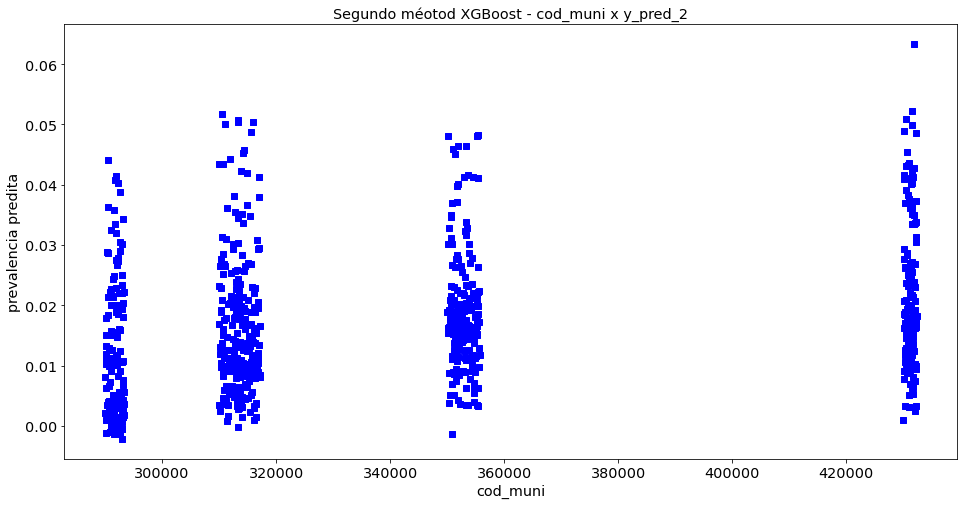

In [50]:
plt.scatter(X_test['cod_muni'], y_pred_2, c = "blue", marker = "s")
plt.title("Segundo méotod XGBoost - cod_muni x y_pred_2")
plt.xlabel("cod_muni")
plt.ylabel("prevalencia predita")
plt.show()

In [51]:
erro = y_test - y_pred_2

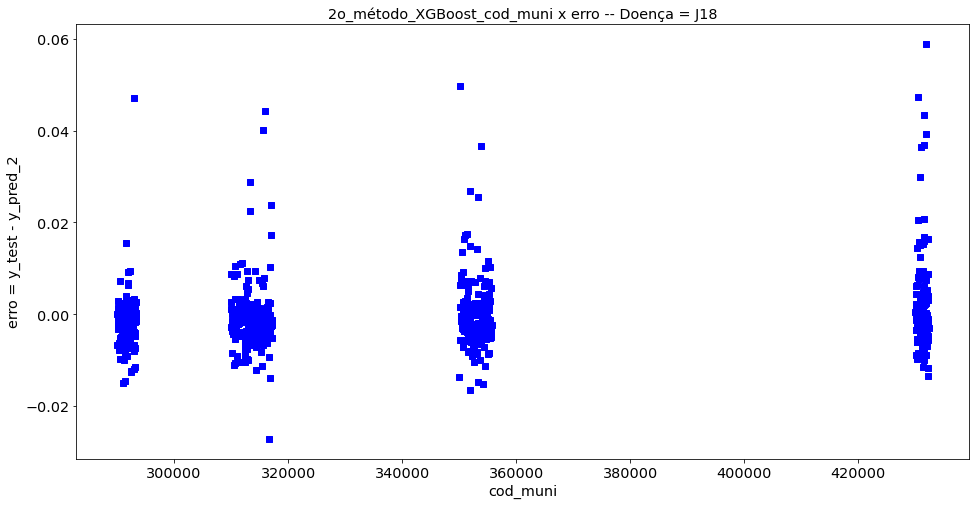

In [52]:
plt.scatter(X_test['cod_muni'], erro, c = "blue", marker = "s")
plt.title("2o_método_XGBoost_cod_muni x erro -- Doença = J18")
plt.xlabel("cod_muni")
plt.ylabel("erro = y_test - y_pred_2")
plt.show()

In [53]:
X.sample(1)

V017_domicilio01  qtd_mora  incidencia  SITU8_entorno  V038_domicilio01  \
8750          0.174736     25342         555       0.184704          0.202282   

      V016_domicilio01  renda_media_mora  existe_esgoto_entorno  \
8750          0.911797          0.108597               0.206516   

      V024_domicilio01  existe_buero_entorno  
8750          0.887173              0.002237

In [54]:
x_in=X_test.iloc[0:2,:]

In [55]:
y_pred_in = best_xgb_model.predict(x_in)

In [56]:
# predição da prevalência
y_pred_in

array([0.00349423, 0.04120356], dtype=float32)

In [57]:
X_test.head(2)

cod_muni  qtd_mora  incidencia  renda_media_mora  SITU1_entorno  \
108673    355180     12943          65          0.177488       0.522354   
110206    355380     22207         880          0.259093       0.842021   

        SITU2_entorno  SITU3_entorno  SITU4_entorno  SITU5_entorno  \
108673       0.023743       0.000000            0.0        0.01364   
110206       0.000000       0.040623            0.0        0.00000   

        SITU6_entorno  SITU7_entorno  SITU8_entorno  V001_entorno  \
108673            0.0       0.000000       0.440263           1.0   
110206            0.0       0.008445       0.108911           1.0   

        existe_pav_entorno  n_existe_pav_entorno  existe_calc_entorno  \
108673            0.462743              0.056833             0.301844   
110206            0.854543              0.024025             0.803582   

        n_existe_calc_entorno  existe_mfio_entorno  n_existe_mfio_entorno  \
108673               0.217732             0.459965               0.059611   
110206               0.074985             0.846535               0.032033   

        existe_buero_entorno  n_existe_buero_entorno  existe_arbo_entorno  \
108673              0.117707                0.401869             0.285173   
110206              0.203116                0.675451             0.811590   

        n_existe_arbo_entorno  existe_esgoto_entorno  n_existe_esgoto_entorno  \
108673               0.234403               0.056580                 0.462996   
110206               0.066977               0.003495                 0.875073   

        existe_lixo_entorno  n_existe_lixo_entorno  V001_domicilio01  \
108673             0.143976               0.375600               1.0   
110206             0.002475               0.876092               1.0   

        V012_domicilio01  V013_domicilio01  V014_domicilio01  \
108673          0.618691          0.263368               0.0   
110206          0.868004          0.110069               0.0   

        V015_domicilio01  V016_domicilio01  V017_domicilio01  \
108673          0.107196          0.973013          0.480010   
110206          0.012695          0.987161          0.863676   

        V018_domicilio01  V019_domicilio01  V020_domicilio01  \
108673          0.268366          0.108196          0.096452   
110206          0.027121          0.088430          0.005338   

        V021_domicilio01  V022_domicilio01  V023_domicilio01  \
108673          0.009745          0.010245          0.016242   
110206          0.002020          0.000577          0.003606   

        V024_domicilio01  V034_domicilio01  V035_domicilio01  \
108673          0.957521          0.031734          0.893553   
110206          0.982545          0.008223          0.905943   

        V036_domicilio01  V037_domicilio01  V038_domicilio01  \
108673          0.748626          0.144928          0.085707   
110206          0.883295          0.022649          0.069388   

        V039_domicilio01  V040_domicilio01  V041_domicilio01  \
108673          0.002749          0.004748            0.0005   
110206          0.006492          0.001587            0.0000   

        V042_domicilio01  V043_domicilio01  V046_domicilio01  \
108673          0.001999          0.972014          0.017241   
110206          0.007357          0.989036          0.001731   

        V060_domicilio01  V061_domicilio01  V001_domicilio02  \
108673          0.070715          0.126187               1.0   
110206          0.096220          0.076457               1.0   

        V012_domicilio02  V013_domicilio02  V014_domicilio02  \
108673          0.633833          0.252595               0.0   
110206          0.868198          0.114979               0.0   

        V015_domicilio02  V016_domicilio02  V017_domicilio02  \
108673          0.108804          0.979316          0.487659   
110206          0.013055          0.993989          0.865596   

        V018_domicilio02  V019_domicilio02  V020_domicilio02  \
108673          0.263591       

In [58]:
x_in.head(2)

cod_muni  qtd_mora  incidencia  renda_media_mora  SITU1_entorno  \
108673    355180     12943          65          0.177488       0.522354   
110206    355380     22207         880          0.259093       0.842021   

        SITU2_entorno  SITU3_entorno  SITU4_entorno  SITU5_entorno  \
108673       0.023743       0.000000            0.0        0.01364   
110206       0.000000       0.040623            0.0        0.00000   

        SITU6_entorno  SITU7_entorno  SITU8_entorno  V001_entorno  \
108673            0.0       0.000000       0.440263           1.0   
110206            0.0       0.008445       0.108911           1.0   

        existe_pav_entorno  n_existe_pav_entorno  existe_calc_entorno  \
108673            0.462743              0.056833             0.301844   
110206            0.854543              0.024025             0.803582   

        n_existe_calc_entorno  existe_mfio_entorno  n_existe_mfio_entorno  \
108673               0.217732             0.459965               0.059611   
110206               0.074985             0.846535               0.032033   

        existe_buero_entorno  n_existe_buero_entorno  existe_arbo_entorno  \
108673              0.117707                0.401869             0.285173   
110206              0.203116                0.675451             0.811590   

        n_existe_arbo_entorno  existe_esgoto_entorno  n_existe_esgoto_entorno  \
108673               0.234403               0.056580                 0.462996   
110206               0.066977               0.003495                 0.875073   

        existe_lixo_entorno  n_existe_lixo_entorno  V001_domicilio01  \
108673             0.143976               0.375600               1.0   
110206             0.002475               0.876092               1.0   

        V012_domicilio01  V013_domicilio01  V014_domicilio01  \
108673          0.618691          0.263368               0.0   
110206          0.868004          0.110069               0.0   

        V015_domicilio01  V016_domicilio01  V017_domicilio01  \
108673          0.107196          0.973013          0.480010   
110206          0.012695          0.987161          0.863676   

        V018_domicilio01  V019_domicilio01  V020_domicilio01  \
108673          0.268366          0.108196          0.096452   
110206          0.027121          0.088430          0.005338   

        V021_domicilio01  V022_domicilio01  V023_domicilio01  \
108673          0.009745          0.010245          0.016242   
110206          0.002020          0.000577          0.003606   

        V024_domicilio01  V034_domicilio01  V035_domicilio01  \
108673          0.957521          0.031734          0.893553   
110206          0.982545          0.008223          0.905943   

        V036_domicilio01  V037_domicilio01  V038_domicilio01  \
108673          0.748626          0.144928          0.085707   
110206          0.883295          0.022649          0.069388   

        V039_domicilio01  V040_domicilio01  V041_domicilio01  \
108673          0.002749          0.004748            0.0005   
110206          0.006492          0.001587            0.0000   

        V042_domicilio01  V043_domicilio01  V046_domicilio01  \
108673          0.001999          0.972014          0.017241   
110206          0.007357          0.989036          0.001731   

        V060_domicilio01  V061_domicilio01  V001_domicilio02  \
108673          0.070715          0.126187               1.0   
110206          0.096220          0.076457               1.0   

        V012_domicilio02  V013_domicilio02  V014_domicilio02  \
108673          0.633833          0.252595               0.0   
110206          0.868198          0.114979               0.0   

        V015_domicilio02  V016_domicilio02  V017_domicilio02  \
108673          0.108804          0.979316          0.487659   
110206          0.013055          0.993989          0.865596   

        V018_domicilio02  V019_domicilio02  V020_domicilio02  \
108673          0.263591       

In [59]:
y_test

108673    0.005022
110206    0.039627
99998     0.008027
61840     0.007320
95562     0.001646
            ...   
109199    0.006721
60086     0.004217
95662     0.022073
40006     0.011193
14226     0.003894
Name: prevalencia, Length: 723, dtype: float64